**21st International Conference on Business Process Management**

Forum for researchers and practitioners in the field of Business Process Management.

Below the descriptive statistics is presented. 

In [860]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.display import display

import networkx as nxt
import seaborn as sns


In [861]:
data = pd.read_excel("bpm_overview.xlsx")

Total amount of published papers: 76


Number of authors: 202
Average Authors per Paper: 3.42
Amount of scientific papers by categories:
paper            27
forum paper      23
demo             16
Ph.D. project     7
disseration       3


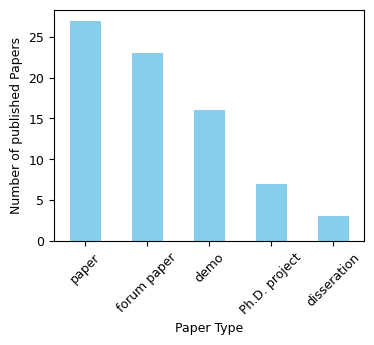

In [862]:
#total amount of papers
total_papers = data['Paper_Title'].nunique()
print(f"Total amount of published papers: {total_papers}\n")

#authors_count
unique_authors_num = data.groupby(['First_Name', 'Last_Name']).ngroup().nunique()
print(f"\nNumber of authors: {unique_authors_num}")

#the average number of authors per paper
paper_author_counts = data['Paper_Title'].value_counts()
average_authors_per_paper = paper_author_counts.mean()
print(f'Average Authors per Paper: {average_authors_per_paper:.2f}')

#amount of papers by category
data_byCat = data.groupby('Paper_Type')['Paper_Title'].nunique()
data_byCat = data_byCat.sort_values(ascending=False)
print(f"Amount of scientific papers by categories:\n{data_byCat.to_string(header=False)}")

#amount of papers by category - visualization
plt.figure(figsize=(4, 3))
data_byCat.plot(kind='bar', color='skyblue')
plt.xlabel('Paper Type')
plt.ylabel('Number of published Papers')
plt.xticks(rotation=45)
plt.show()

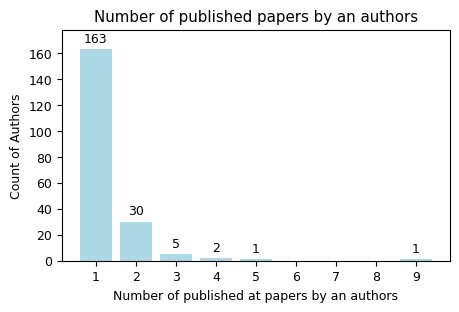

In [863]:
data_byAuthor = data.groupby(['First_Name', 'Last_Name'])['Paper_Title'].nunique()
data_byAuthor = data_byAuthor.reset_index()  

# Count how many authors wrote each number of papers
paper_count_by_author = data_byAuthor.groupby('Paper_Title').size().reset_index(name='Count')


plt.figure(figsize=(5, 3))
bars = plt.bar(paper_count_by_author['Paper_Title'], paper_count_by_author['Count'], color='lightblue')
plt.title('Number of published papers by an authors')
plt.xlabel('Number of published at papers by an authors')
plt.ylabel('Count of Authors')
plt.xticks(rotation=0)
plt.ylim(0, max(paper_count_by_author['Count']) + 15) 
plt.rcParams.update({'font.size': 9})
plt.xticks(range(1, 10))


for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  
                 textcoords='offset points',
                 ha='center', va='bottom',  fontsize=9)

plt.show()

First_Name      Last_Name    
Wil M.P.        van der Aalst    9
Stefanie        Rinderle-Ma      5
Jan             Mendling         4
Marco           Montali          4
Remco           Dijkman          3
Pnina           Soffer           3
Timotheus       Kampik           3
Sebastiaan      van Zelst        3
Fabrizio Maria  Maggi            3
Name: Paper_Title, dtype: int64


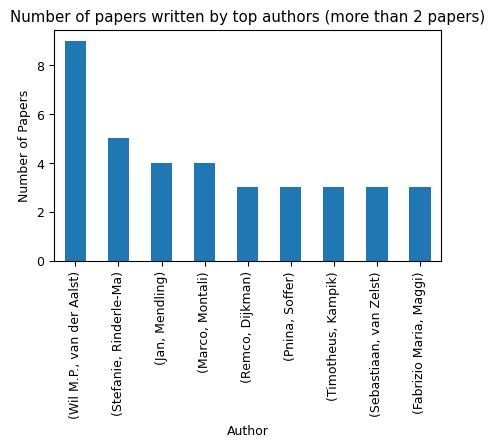

In [864]:
#Find "key players"
data_byAuthor = data.groupby(['First_Name', 'Last_Name'])['Paper_Title'].nunique()
data_byAuthor = data_byAuthor.sort_values(ascending=False)
top_authors = data_byAuthor[data_byAuthor > 2]

print(top_authors)

# Create a bar chart for top authors
plt.figure(figsize=(5, 3))
top_authors.plot(kind='bar')
plt.title('Number of papers written by top authors (more than 2 papers)')
plt.xlabel('Author')
plt.ylabel('Number of Papers')
plt.xticks(rotation=90)
plt.show()

Keep only high profile papers: BPM Forum and Main Track

In [865]:
#analyze universities - bring to the wide format
data[['org1', 'org2', 'org3']] = data['University'].str.split(';', expand=True)
data[['ctry1', 'ctry2', 'ctry3']] = data['Country'].str.split(';', expand=True)

#remove leading and trailing whitespaces
data_wide = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [866]:
#data cleaning
def unify_org_name(value):
    if value is None:
        return None 
    
    replacements = {
        'RWTH': 'RWTH Aachen University',
        'Hasso': 'Hasso Plattner Institute',
        'Weizenbaum': 'Weizenbaum Institute',
        'Technion': 'Technion - Israel Institute of Technology',
        'WU Vienna': 'Vienna University of Economics and Business',
        'Wirtschaftsuniversität Wien': 'Vienna University of Economics and Business',
        'Sapienza': 'Sapienza University of Rome',
        'Fraunhofer Institute for Applied Information Technology FIT': 'Fraunhofer FIT',
        'Branch Business & Information Systems Engineering of the Fraunhofer FIT': 'Fraunhofer FIT'
    }
    
    for key, replacement in replacements.items():
        if key in value:
            return replacement
    
    return value


data['org1'] = data['org1'].apply(unify_org_name)
data['org2'] = data['org2'].apply(unify_org_name)
data['org3'] = data['org3'].apply(unify_org_name)


In [867]:
# Group the data by 'Paper Title' and extract distinct countries, where papers were created
papers_countries = data_wide.groupby('Paper_Title')['Country'].apply(lambda x: ', '.join(set(x.str.split(', ').sum()))).reset_index()

#replace all ; to , - some bag, does not work without it 
papers_countries['Country'] = papers_countries['Country'].str.replace(';', ',')

#remove duplicates
papers_countries['Country'] = papers_countries['Country'].str.split(', ').apply(lambda x: ', '.join(set(x)))


country_counts = papers_countries['Country'].str.split(', ').explode().value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

print('Amount of researchers, who published for the conference:')
display(country_counts)

def are_countries_same(country_string):
    countries = country_string.split(', ')
    return 'YES' if not all(country == countries[0] for country in countries) else 'NO'


#check if international cooperation was present(e.g. if authors are from different countries)
papers_countries['International'] = papers_countries['Country'].apply(are_countries_same)

# Count the occurrences of 'YES' and 'NO' in the 'International' column
international_counts = papers_countries['International'].value_counts()

percentage_yes = (international_counts.get('YES', 0) / len(papers_countries)) * 100

# Print the result
print(f"International cooperation was present during writing of {percentage_yes:.2f}% of papers")
#papers_countries['International'] = papers_countries['Country_List'].apply(check_international)
display(papers_countries)


Amount of researchers, who published for the conference:


,Country,Count
0,Germany,40
1,The Netherlands,14
2,Italy,12
3,Spain,6
4,Austria,6
5,Australia,6
6,Denmark,5
7,Israel,4
8,Chile,3
9,Belgium,3


International cooperation was present during writing of 42.11% of papers


,Paper_Title,Country,International
0,A Collection of Simulated Event Logs for Fairn...,Germany,NO
1,A Novel Multi-Perspective Trace Clustering Tec...,Belgium,NO
2,A Reference Data Model to Specify Event Logs f...,"Italy, Spain, Norway",YES
3,A Tool for Visualizing Costs of Process Varian...,Chile,NO
4,Action-Evolution Petri Nets: a Framework for M...,The Netherlands,NO
...,...,...,...
71,Towards a Theory on Process Automation Effects,"Germany, Austria",YES
72,Trusted Compliance Checking on Blockchain with...,"Denmark, Italy",YES
73,Verifying Resource Compliance Requirements Fro...,"Germany, The Netherlands",YES
74,Workarounds: The Path from Detection to Improv...,The Netherlands,NO


Visual representation - interactive map, where is shown from which researchers are researchers who published papers for the conference. (For blog-post I will zoom in and make a screenshots)

In [868]:
df = pd.read_excel("coordinates.xlsx", sheet_name='countries')
coordinates = df[df['name'].isin(country_counts['Country'])]
countries = coordinates.merge(country_counts, left_on='name', right_on='Country', how='left')
countries = countries.sort_values(ascending=False, by='Count')
countries = countries.drop('name', axis=1)
display(countries)

countries['text'] = countries['Country'] +': '+ countries['Count'].astype(str) +' researchers'
limits = [(0,1),(2,6),(7,11), (12,18)]
colors = ["royalblue","orange","lightseagreen","crimson","lightgrey"]
cities = []
scale = 10

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = countries[lim[0]:lim[1]+1]
    min_count = df_sub['Count'].min()
    max_count = df_sub['Count'].max()
    label = f'{min_count} - {max_count}'

    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=df_sub['longitude'],
        lat=df_sub['latitude'],
        text=df_sub['text'],
        marker=dict(
            size=df_sub['Count'] * scale,
            color=colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode='area'
        ),
        name=label
    ))


fig.update_layout(
        title_text = 'BPM Conference 2023 - number of researches from different countries',
        showlegend = True,
        geo = dict(
            showcountries = True,
            resolution = 50,
            projection_type = 'winkel tripel',
            scope = 'world',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

,country,latitude,longitude,Country,Count
7,DE,51.165691,10.451526,Germany,40
13,IT,41.871940,12.567380,Italy,12
0,AT,47.516231,14.550072,Austria,6
1,AU,-25.274398,133.775136,Australia,6
10,ES,40.463667,-3.749220,Spain,6
8,DK,56.263920,9.501785,Denmark,5
12,IL,31.046051,34.851612,Israel,4
2,BE,50.503887,4.469936,Belgium,3
5,CL,-35.675147,-71.542969,Chile,3
9,EE,58.595272,25.013607,Estonia,2


In [869]:
data['org1'] = data['org1'].str.strip()
data['org2'] = data['org2'].str.strip()
data['org3'] = data['org3'].str.strip()

data['Organizations'] = data[['org1', 'org2', 'org3']].apply(lambda x: ', '.join(x.dropna()), axis=1)

# Group the data by 'Paper Title' and extract distinct universities
uni = data.groupby('Paper_Title')['Organizations'].apply(lambda x: ', '.join(set(x.str.split(', ').sum()))).reset_index()
uni_comp = uni
uni.to_excel('organization.xlsx', index=False)
# Print the result


uni['Organizations'] = uni['Organizations'].str.split(', ').apply(lambda x: ', '.join(set(x)))

# Count the occurrences of each organization
organization_counts = uni['Organizations'].str.split(', ').explode().value_counts().reset_index()
organization_counts.columns = ['Organization', 'Count']
total_orgs = organization_counts.shape[0]

# Print the result
print(f"Total number of universities and other organisations involved: {total_orgs}")
display(organization_counts)


def are_orgs_same(org_string):
    orgs = org_string.split(', ')
    return 'NO' if len(set(orgs)) == 1 else 'YES'


# Apply the function to each row and create the 'All_Same' column
uni['Interuniversity'] = uni['Organizations'].apply(are_orgs_same)

interuni_counts = uni['Interuniversity'].value_counts()


interuni = (interuni_counts.get('YES', 0) / len(uni)) * 100

# Print the result
print(f"Cooperation between different universities or organization was present during the creating of {interuni:.2f}% projects")


Total number of universities and other organisations involved: 83


,Organization,Count
0,RWTH Aachen University,12
1,Technical University of Munich,8
2,Eindhoven University of Technology,8
3,Free University of Bozen-Bolzano,5
4,Fraunhofer FIT,5
...,...,...
78,University of Copenhagen,1
79,University of Castilla - La Mancha,1
80,University of Udine,1
81,University of Naples Federico II,1


Cooperation between different universities or organization was present during the creating of 63.16% projects


**Landscape of how the community is interconnected.**

Pink nodes represent universities(other organizations) which are connected with more than 5 other universities(organizations) through the creating scientific projects for the conference. Blue: 2 to 5 connections and Green: 1

,Paper_Title,Organizations,Interuniversity
0,A Collection of Simulated Event Logs for Fairn...,RWTH Aachen University,NO
1,A Novel Multi-Perspective Trace Clustering Tec...,KU Leuven,NO
2,A Reference Data Model to Specify Event Logs f...,"Oslo Metropolitan University, JOT Internet Med...",YES
3,A Tool for Visualizing Costs of Process Varian...,Pontificia Universidad Católica de Chile,NO
4,Action-Evolution Petri Nets: a Framework for M...,Eindhoven Artificial Intelligence Systems Inst...,YES
...,...,...,...
71,Towards a Theory on Process Automation Effects,"Humboldt-Universität zu Berlin, Kühne Logistic...",YES
72,Trusted Compliance Checking on Blockchain with...,"Politecnico di Milano, Technical University of...",YES
73,Verifying Resource Compliance Requirements Fro...,"Technical University of Munich, Eindhoven Univ...",YES
74,Workarounds: The Path from Detection to Improv...,Utrecht University,NO


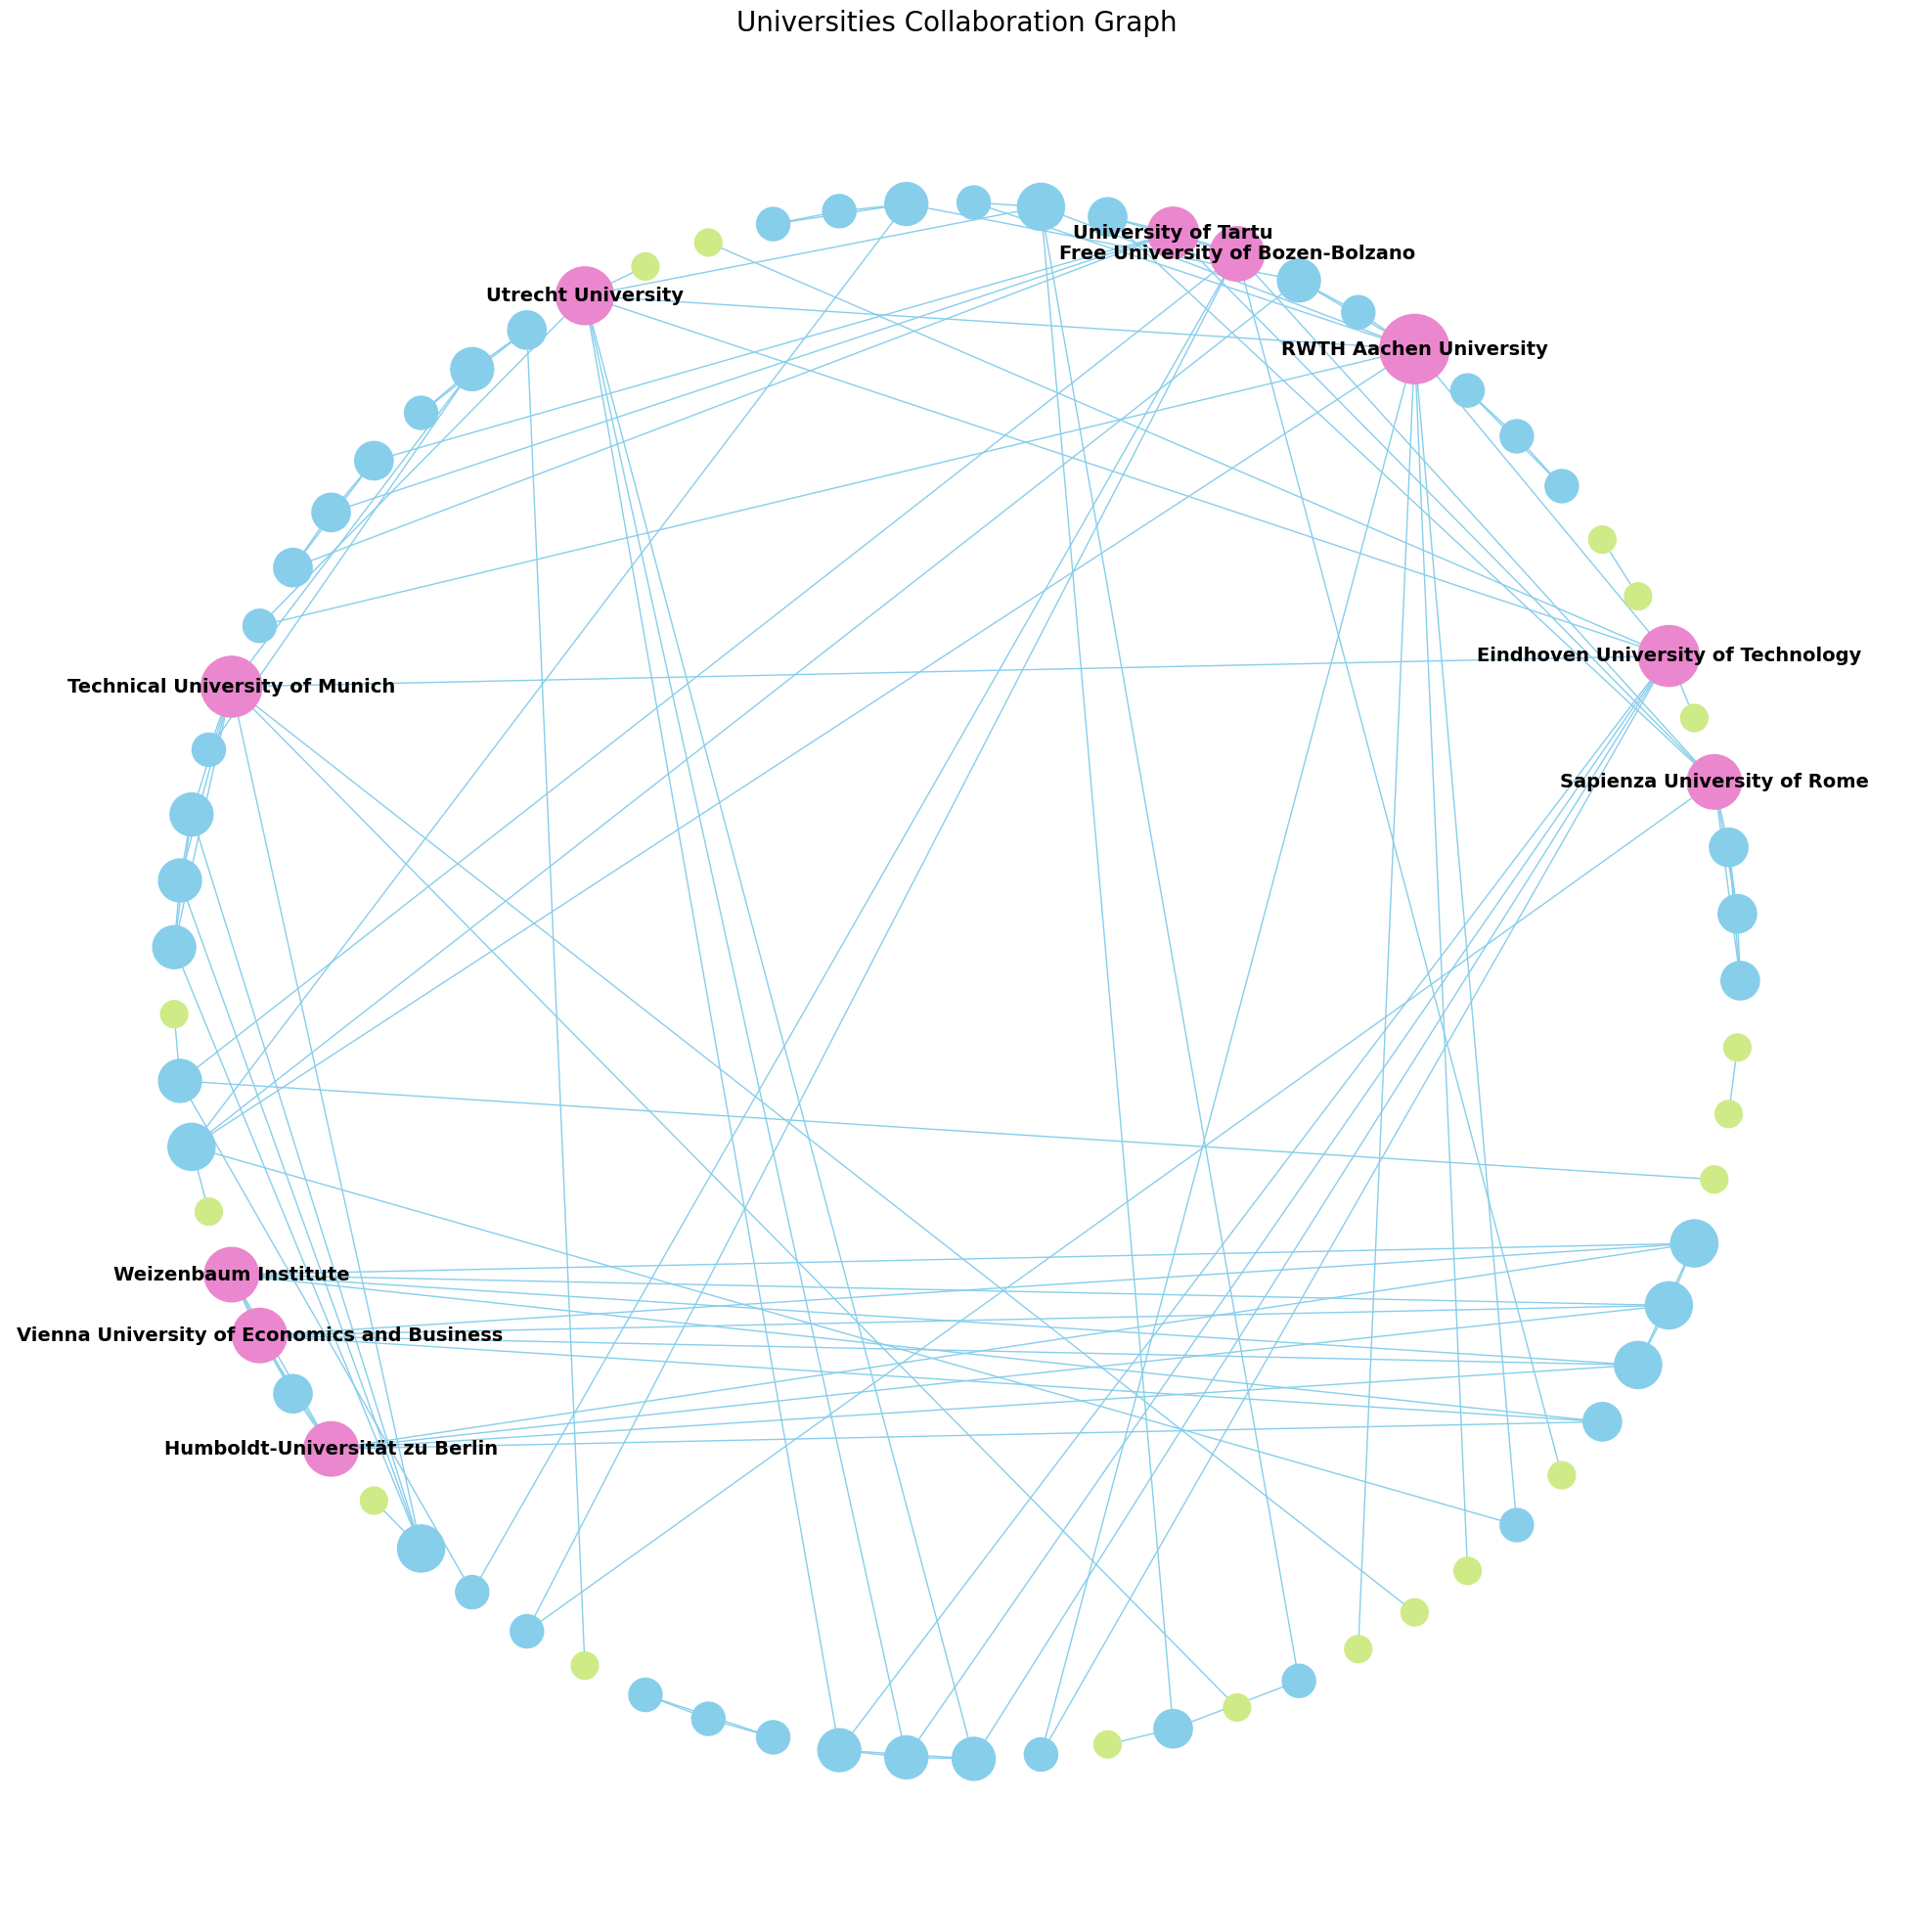

In [870]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns


uni = uni_comp
display(uni)
uni['Organizations'] = uni['Organizations'].str.split(', ')
G = nx.Graph()

for index, row in uni.iterrows():
    universities = row['Organizations']
    if universities is not None:
        # Add edges to the graph for all pairs of universities
        for u1 in universities:
            for u2 in universities:
                if u1 != u2:
                    if G.has_edge(u1, u2):
                        G[u1][u2]['weight'] += 1
                    else:
                        G.add_edge(u1, u2, weight=1)

# Calculate edge colors based on edge weights (collaboration strength)
# edge_colors = []
# for u, v, data in G.edges(data=True):
#     weight = data['weight']
#     if weight >= 5:
#         edge_colors.append('red')
#     else:
#         edge_colors.append('skyblue')

# node sizes 
node_degrees = dict(G.degree())
node_sizes = [200 * (degree + 1) for degree in node_degrees.values()]  # Increase scaling for larger nodes

#  node colors 
node_colors = ['#87CEEB' if (degree <= 5 and degree >= 2) else ('#CEEB87' if degree < 2 else '#EB87CE') for degree in node_degrees.values()]

plt.figure(figsize=(25, 25))  
pos = nx.circular_layout(G) 
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_edges(G, pos, edge_color='skyblue')
node_labels = {}
for node, degree in node_degrees.items():
    if degree > 5:
        node_labels[node] = node
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=14, font_color='black', font_weight='semibold')
#nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold')
plt.title('Universities Collaboration Graph', fontsize=20)
plt.axis('off')
plt.show()


In [871]:
data_filtered = data.query("Paper_Type in ['forum paper', 'paper']")

In [872]:
#amount of unique papers in main track and forum categories
total_papers_hp = data_filtered['Paper_Title'].nunique()
print(f"Unique number of papers in Main Track and Forum categories: {total_papers_hp}")

#authors_count
authors_num_hp = data_filtered.groupby(['First_Name', 'Last_Name']).ngroup().nunique()
print(f"\nNumber of authors: {authors_num_hp}")

#the average number of authors per paper
author_counts_hp = data_filtered['Paper_Title'].value_counts()
av_authors_hp = author_counts_hp.mean()
print(f'Average Authors per Paper: {av_authors_hp:.2f}\n')

#add distribution here 


#Find "key players"
data_byAuthor_hp = data_filtered.groupby(['First_Name', 'Last_Name'])['Paper_Title'].nunique()
data_byAuthor_hp = data_byAuthor.sort_values(ascending=False)
top_authors = data_byAuthor[data_byAuthor > 1]

print("\"Key Players\" amoung high profile papers:\n")
print(top_authors)


Unique number of papers in Main Track and Forum categories: 50

Number of authors: 150
Average Authors per Paper: 3.64

"Key Players" amoung high profile papers:

First_Name      Last_Name    
Wil M.P.        van der Aalst    9
Stefanie        Rinderle-Ma      5
Jan             Mendling         4
Marco           Montali          4
Remco           Dijkman          3
Pnina           Soffer           3
Timotheus       Kampik           3
Sebastiaan      van Zelst        3
Fabrizio Maria  Maggi            3
Massimiliano    de Leoni         2
Marco           Pegoraro         2
Jochen          De Weerdt        2
Ralph           Bergmann         2
Barbara         Weber            2
Sebastiaan J.   van Zelst        2
Dirk            Fahland          2
Sarah           Winkler          2
Sander J.J.     Leemans          2
Irit            Hadar            2
Dario           Benvenuti        2
Iris            Beerepoot        2
Tijs            Slaats           2
Fabian          Stiehle          2
Ig

In [873]:
data_wide_filtered = data.query("Paper_Type in ['forum paper', 'paper']")
# data_wide_filtered['org1'] = data_wide_filtered['org1'].str.strip()
# data_wide_filtered['org2'] = data_wide_filtered['org2'].str.strip()
# data_wide_filtered['org3'] = data_wide_filtered['org3'].str.strip()

# data_wide_filtered['Organizations'] = data_wide_filtered[['org1', 'org2', 'org3']].apply(lambda x: ', '.join(x.dropna()), axis=1)

# Group the data by 'Paper Title' and extract distinct universities
uni_filtered = data_wide_filtered.groupby('Paper_Title')['Organizations'].apply(lambda x: ', '.join(set(x.str.split(', ').sum()))).reset_index()
uni_comp_f = uni_filtered
# uni_filtered.to_excel('organization.xlsx', index=False)

#uni_filtered['Organizations'] = uni_filtered['Organizations'].str.split(', ').apply(lambda x: ', '.join(set(x)))

# Count the occurrences of each organization
organization_counts_f = uni_filtered['Organizations'].str.split(', ').explode().value_counts().reset_index()
organization_counts_f.columns = ['Organization', 'Count']

# Print the result
display(organization_counts_f)


def are_orgs_same(org_string):
    orgs = org_string.split(', ')
    return 'NO' if len(set(orgs)) == 1 else 'YES'


# Apply the function to each row and create the 'All_Same' column
uni_filtered['Collaboration'] = uni_filtered['Organizations'].apply(are_orgs_same)
display(uni)

interuni_counts_f = uni_filtered['Collaboration'].value_counts()


interuni = (interuni_counts_f.get('YES', 0) / len(uni_filtered)) * 100

# Print the result
print(f"Cooperation between different universities or organization was present during the creating of {interuni:.2f}% projects")

,Organization,Count
0,RWTH Aachen University,8
1,Eindhoven University of Technology,7
2,Technical University of Munich,5
3,Queensland University of Technology,4
4,Humboldt-Universität zu Berlin,4
...,...,...
63,Copenhagen University,1
64,Philipps-University of Marburg,1
65,Oslo Metropolitan University,1
66,Ghent University,1


,Paper_Title,Organizations,Interuniversity
0,A Collection of Simulated Event Logs for Fairn...,[RWTH Aachen University],NO
1,A Novel Multi-Perspective Trace Clustering Tec...,[KU Leuven],NO
2,A Reference Data Model to Specify Event Logs f...,"[Oslo Metropolitan University, JOT Internet Me...",YES
3,A Tool for Visualizing Costs of Process Varian...,[Pontificia Universidad Católica de Chile],NO
4,Action-Evolution Petri Nets: a Framework for M...,[Eindhoven Artificial Intelligence Systems Ins...,YES
...,...,...,...
71,Towards a Theory on Process Automation Effects,"[Humboldt-Universität zu Berlin, Kühne Logisti...",YES
72,Trusted Compliance Checking on Blockchain with...,"[Politecnico di Milano, Technical University o...",YES
73,Verifying Resource Compliance Requirements Fro...,"[Technical University of Munich, Eindhoven Uni...",YES
74,Workarounds: The Path from Detection to Improv...,[Utrecht University],NO


Cooperation between different universities or organization was present during the creating of 74.00% projects


**Landscape of how the community is interconnected.High Profile papers ** 

Red nodes represent universities(other organizations) which are connected with more than 5 other universities(organizations) through the creating scientific projects for the conference. Blue: 2 to 5 connections and Green: 1

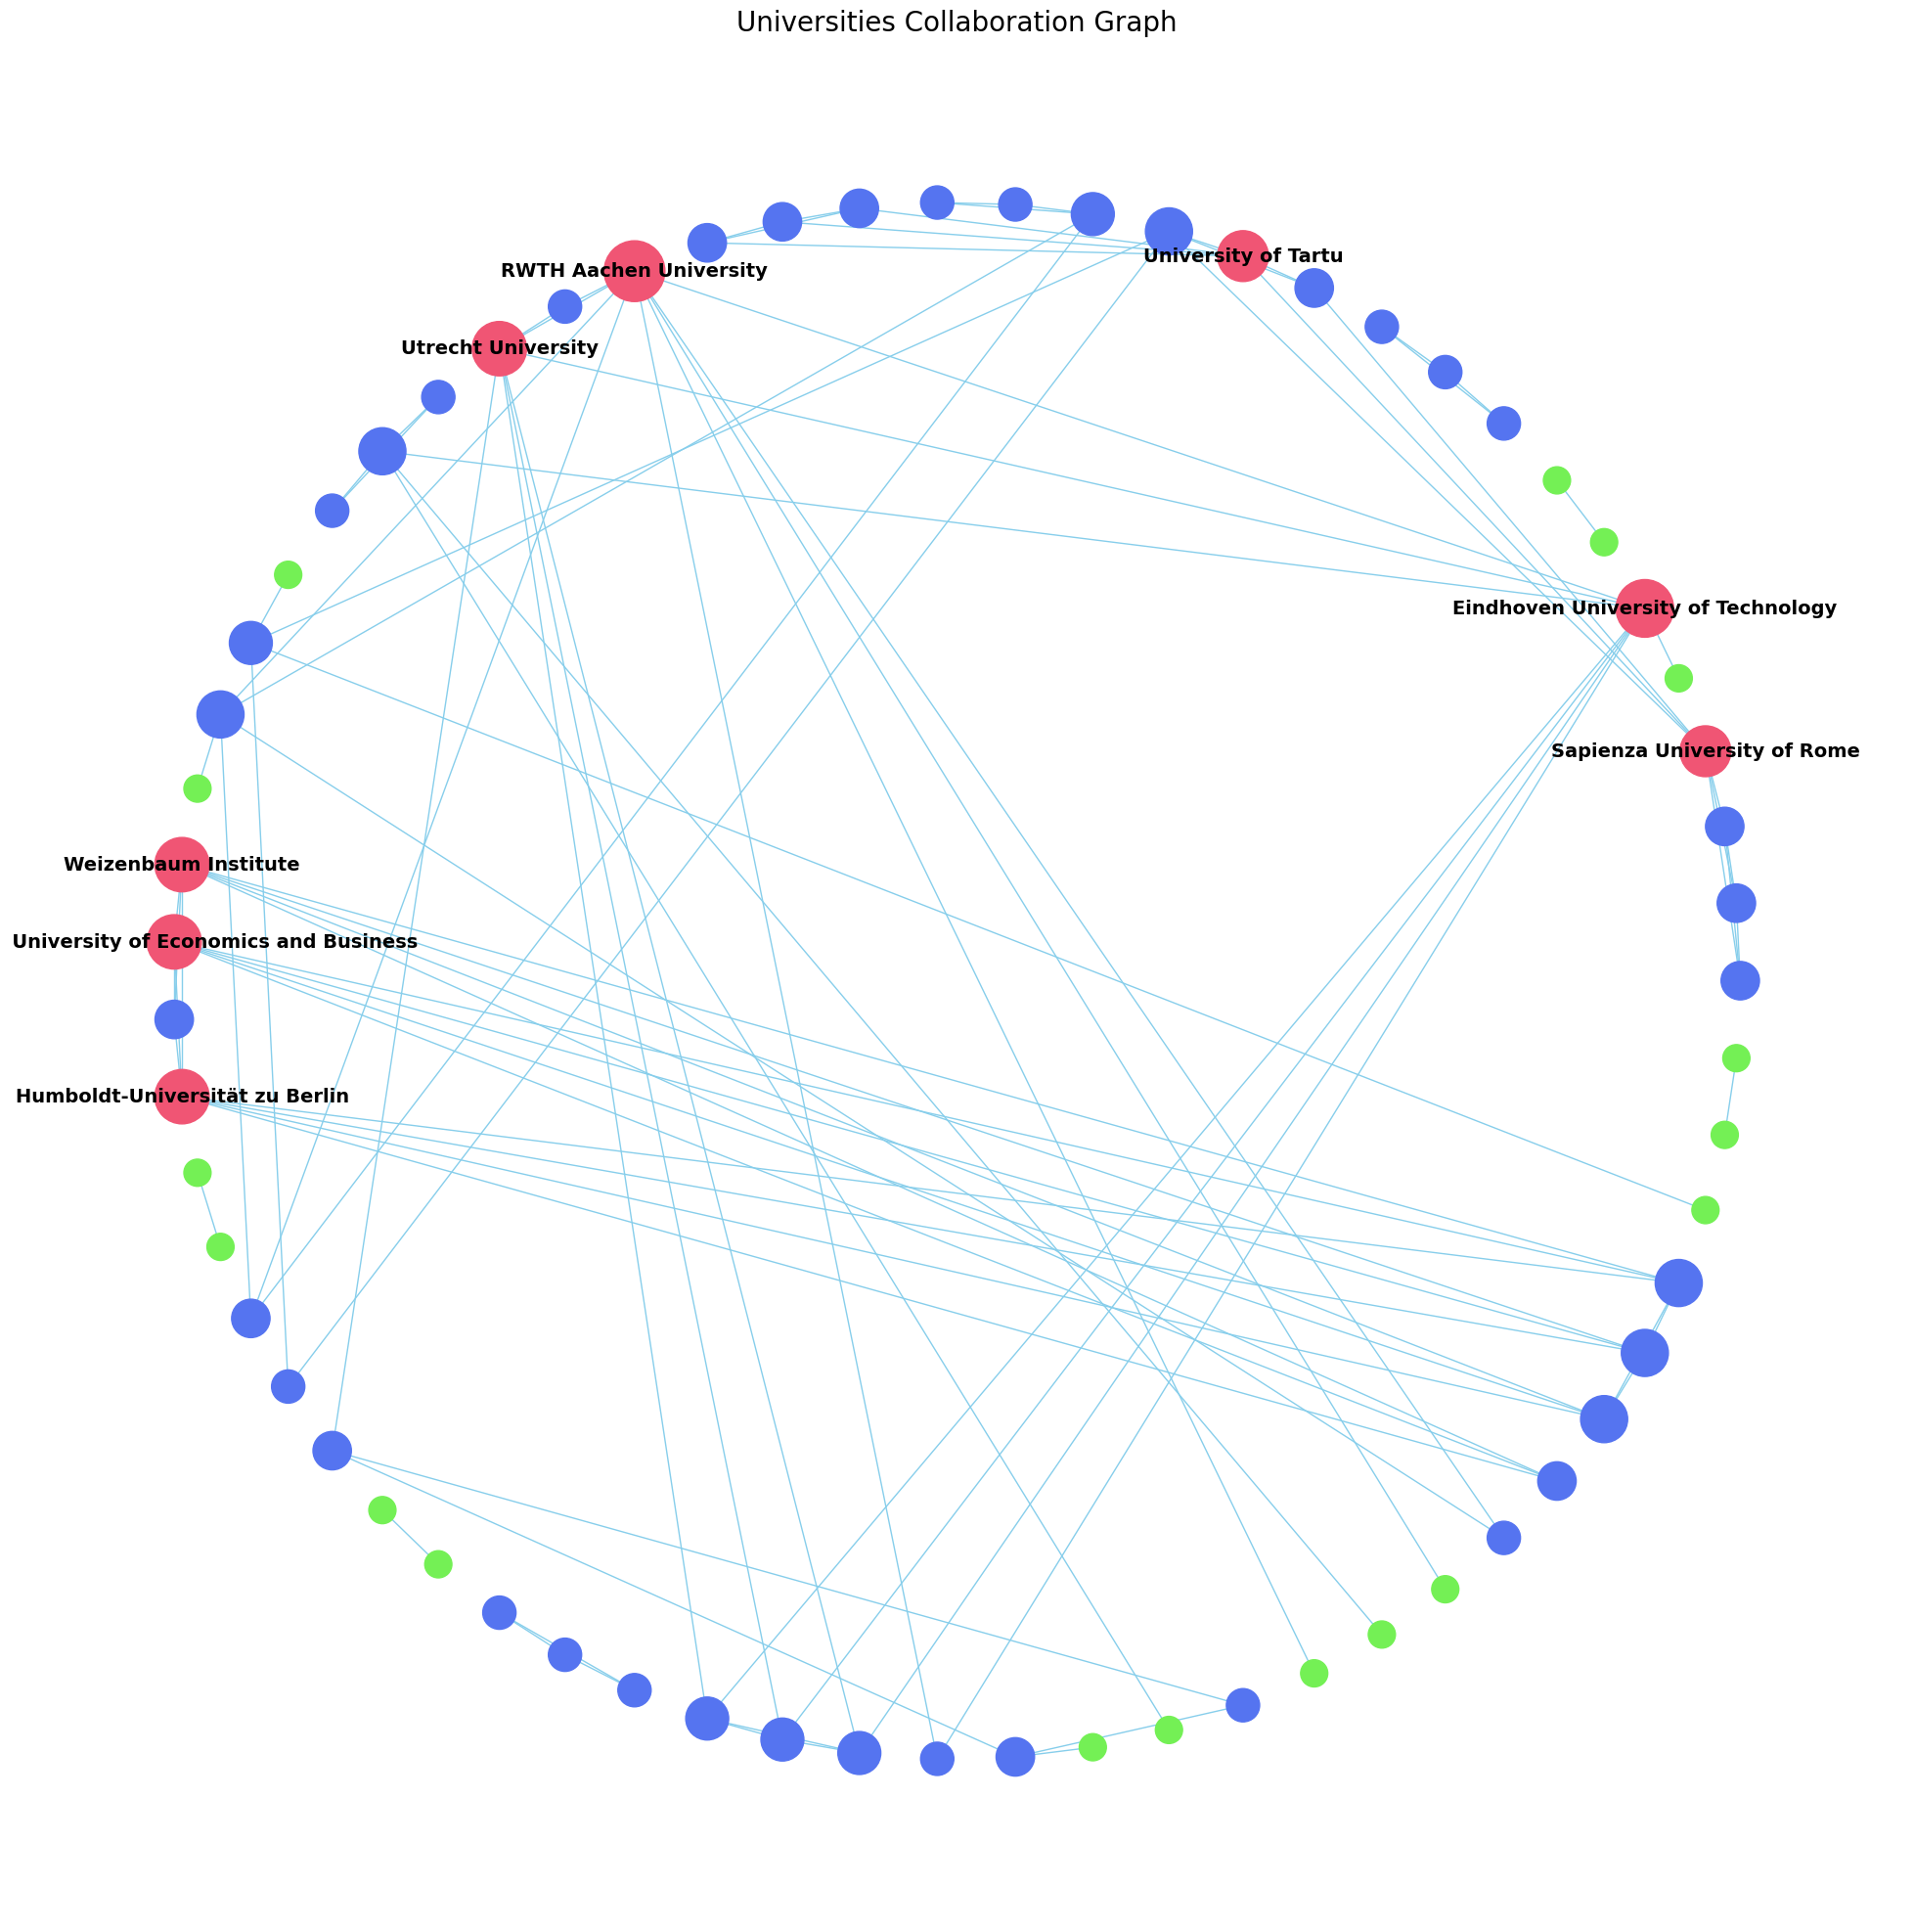

In [874]:
#uni = uni_filtered
#display(uni_filtered)
uni_filtered['Organizations'] = uni_filtered['Organizations'].str.split(', ')
G = nx.Graph()

for index, row in uni_filtered.iterrows():
    universities = row['Organizations']
    if universities is not None:
        # Add edges to the graph for all pairs of universities
        for u1 in universities:
            for u2 in universities:
                if u1 != u2:
                    if G.has_edge(u1, u2):
                        G[u1][u2]['weight'] += 1
                    else:
                        G.add_edge(u1, u2, weight=1)

# Calculate edge colors based on edge weights (collaboration strength)
# edge_colors = []
# for u, v, data in G.edges(data=True):
#     weight = data['weight']
#     if weight >= 5:
#         edge_colors.append('red')
#     else:
#         edge_colors.append('skyblue')

# node sizes 
node_degrees = dict(G.degree())
node_sizes = [200 * (degree + 1) for degree in node_degrees.values()]  # Increase scaling for larger nodes

#  node colors 
node_colors = ['#5574F0' if (degree <= 5 and degree >= 2) else ('#74F055' if degree < 2 else '#F05574') for degree in node_degrees.values()]

plt.figure(figsize=(25, 25))  
pos = nx.circular_layout(G) 
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_edges(G, pos, edge_color='skyblue')
node_labels = {}
for node, degree in node_degrees.items():
    if degree > 5:
        node_labels[node] = node
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=14, font_color='black', font_weight='semibold')
#nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold')
plt.title('Universities Collaboration Graph', fontsize=20)
plt.axis('off')
plt.show()


In [875]:
# Group the data by 'Paper Title' and extract distinct countries, where papers were created
countries_hp = data_filtered.groupby('Paper_Title')['Country'].apply(lambda x: ', '.join(set(x.str.split(', ').sum()))).reset_index()

#replace all ; to , - some bag, does not work without it 
countries_hp['Country'] = countries_hp['Country'].str.replace(';', ',')

#remove duplicates
countries_hp['Country'] = countries_hp['Country'].str.split(', ').apply(lambda x: ', '.join(set(x)))


country_counts_hp = countries_hp['Country'].str.split(', ').explode().value_counts().reset_index()
country_counts_hp.columns = ['Country', 'Count']

print('Amount of researchers, who published for the conference among high profile papers:')
display(country_counts_hp.head(10))

def are_countries_same(country_string):
    countries = country_string.split(', ')
    return 'YES' if not all(country == countries[0] for country in countries) else 'NO'


#check if international cooperation was present(e.g. if authors are from different countries)
countries_hp['International'] = countries_hp['Country'].apply(are_countries_same)

# Count the occurrences of 'YES' and 'NO' in the 'International' column
international_hp = countries_hp['International'].value_counts()

percentage_yes = (international_hp.get('YES', 0) / len(countries_hp)) * 100

# Print the result
print(f"International cooperation was present during writing of {percentage_yes:.2f}% of high profile papers")
#papers_countries['International'] = papers_countries['Country_List'].apply(check_international)
display(countries_hp.head(10))

Amount of researchers, who published for the conference among high profile papers:


,Country,Count
0,Germany,28
1,The Netherlands,10
2,Italy,7
3,Austria,6
4,Australia,5
5,Denmark,4
6,Spain,3
7,Belgium,2
8,Switzerland,2
9,Israel,2


International cooperation was present during writing of 50.00% of high profile papers


,Paper_Title,Country,International
0,A Novel Multi-Perspective Trace Clustering Tec...,Belgium,NO
1,A Reference Data Model to Specify Event Logs f...,"Italy, Spain, Norway",YES
2,Action-Evolution Petri Nets: a Framework for M...,The Netherlands,NO
3,Adding the sustainability dimension in process...,"Uruguay, Spain",YES
4,Agent Miner: An Algorithm for Discovering Agen...,"Australia, Canada",YES
5,An SQL-Based Declarative Process Mining Framew...,"Italy, Estonia",YES
6,Analytics Pipeline for Process Mining on Video...,Germany,NO
7,Approximating Multi-Perspective Trace Alignmen...,Italy,NO
8,Benevolent Business Processes – Design Guideli...,Australia,NO
9,Business Process Management Maturity and Proce...,The Netherlands,NO


In [876]:
df = pd.read_excel("coordinates.xlsx", sheet_name='countries')
coordinates = df[df['name'].isin(country_counts_hp['Country'])]
countries_hp = coordinates.merge(country_counts_hp, left_on='name', right_on='Country', how='left')
countries_hp = countries_hp.sort_values(ascending=False, by='Count')
countries_hp = countries_hp.drop('name', axis=1)
display(countries_hp)

countries_hp['text'] = countries_hp['Country'] +': '+ countries_hp['Count'].astype(str) +' researchers'
limits = [(0,1),(2,5),(6,10), (11,15)]
colors = ["royalblue","orange","lightseagreen","crimson","lightgrey"]
cities = []
scale = 10

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = countries_hp[lim[0]:lim[1]+1]
    min_count = df_sub['Count'].min()
    max_count = df_sub['Count'].max()
    label = f'{min_count} - {max_count}'

    fig.add_trace(go.Scattergeo(
        locationmode='ISO-3',
        lon=df_sub['longitude'],
        lat=df_sub['latitude'],
        text=df_sub['text'],
        marker=dict(
            size=df_sub['Count'] * scale,
            color=colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode='area'
        ),
        name=label
    ))


fig.update_layout(
        title_text = 'BPM Conference 2023 - number of authors of "high profile papers" from different countries',
        showlegend = True,
        geo = dict(
            showcountries = True,
            resolution = 50,
            projection_type = 'winkel tripel',
            scope = 'world',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

,country,latitude,longitude,Country,Count
6,DE,51.165691,10.451526,Germany,28
12,IT,41.871940,12.567380,Italy,7
0,AT,47.516231,14.550072,Austria,6
1,AU,-25.274398,133.775136,Australia,5
7,DK,56.263920,9.501785,Denmark,4
9,ES,40.463667,-3.749220,Spain,3
2,BE,50.503887,4.469936,Belgium,2
3,CA,56.130366,-106.346771,Canada,2
4,CH,46.818188,8.227512,Switzerland,2
8,EE,58.595272,25.013607,Estonia,2
